In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/machine-learning-ca7/IT_Company_Time_Series.csv
/kaggle/input/machine-learning-ca7/IT_Company_System_Issues_Classification.csv
/kaggle/input/machine-learning-ca7/IT_Retail_List.csv


## Data Fetching for EDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# Load the dataset
time_series_df = pd.read_csv('/kaggle/input/machine-learning-ca7/IT_Company_Time_Series.csv')

print (time_series_df.columns)



Index(['Date', 'Software_1', 'Software_2', 'Software_3', 'Software_4',
       'Software_5', 'Software_6', 'Software_7', 'Software_8', 'Software_9',
       'Software_10', 'Software_11', 'Software_12', 'Software_13',
       'Software_14', 'Software_15'],
      dtype='object')


## Seasonal Decomposition plot and time series usage

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2018-01-31 to 2022-12-31
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Software_1   60 non-null     int64
 1   Software_2   60 non-null     int64
 2   Software_3   60 non-null     int64
 3   Software_4   60 non-null     int64
 4   Software_5   60 non-null     int64
 5   Software_6   60 non-null     int64
 6   Software_7   60 non-null     int64
 7   Software_8   60 non-null     int64
 8   Software_9   60 non-null     int64
 9   Software_10  60 non-null     int64
 10  Software_11  60 non-null     int64
 11  Software_12  60 non-null     int64
 12  Software_13  60 non-null     int64
 13  Software_14  60 non-null     int64
 14  Software_15  60 non-null     int64
dtypes: int64(15)
memory usage: 7.5 KB
None
       Software_1  Software_2  Software_3  Software_4  Software_5  Software_6  \
count   60.000000   60.000000   60.000000   60.000000   60.000000   60.0

/tmp/ipykernel_33/1351111605.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # Forward fill as an example


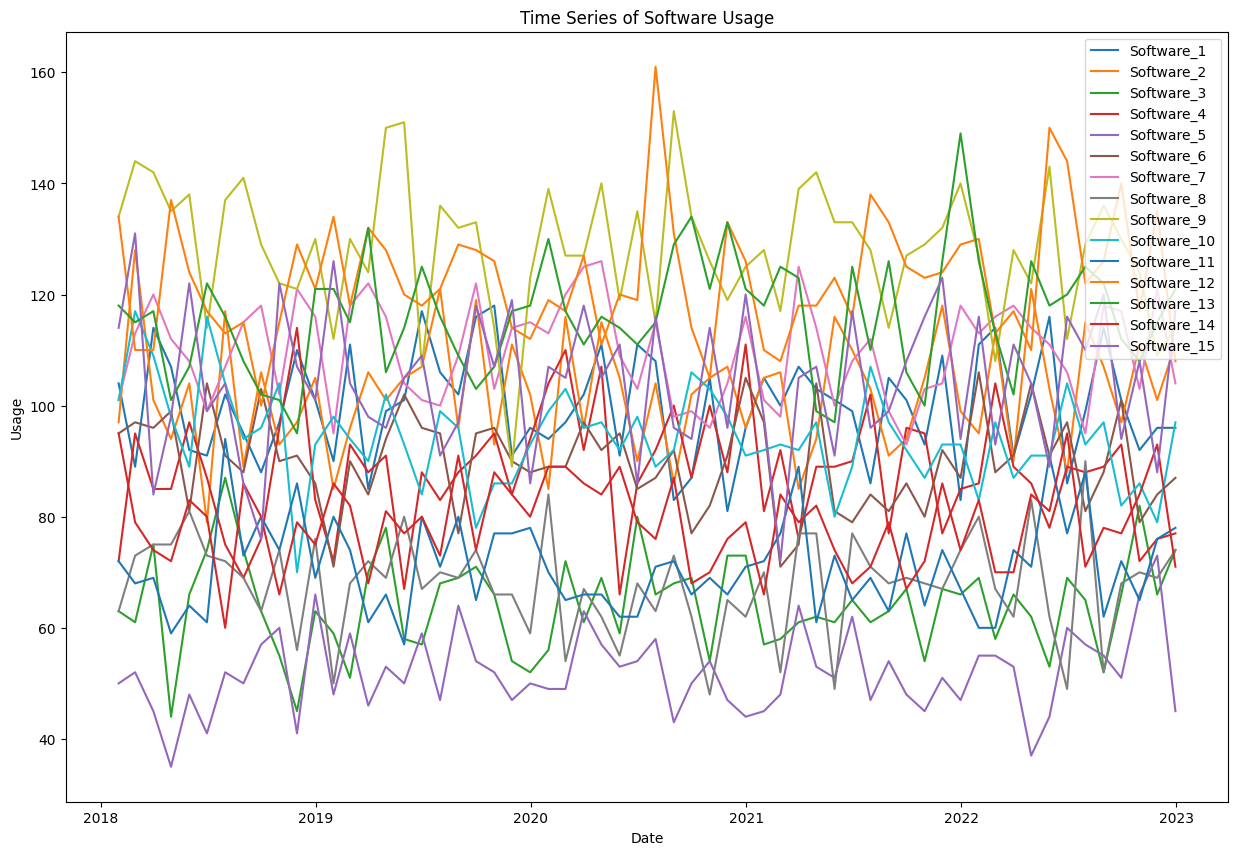

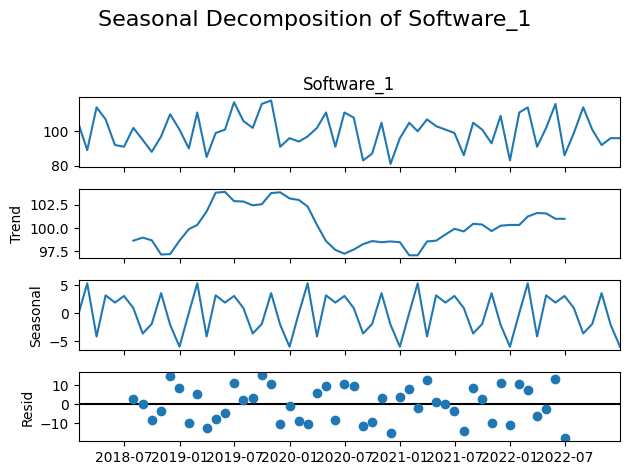

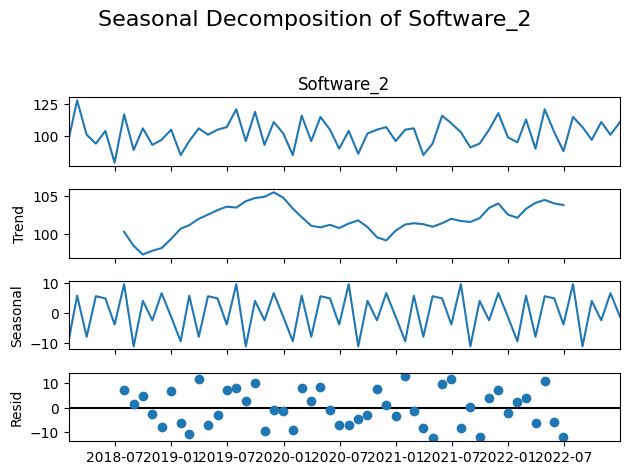

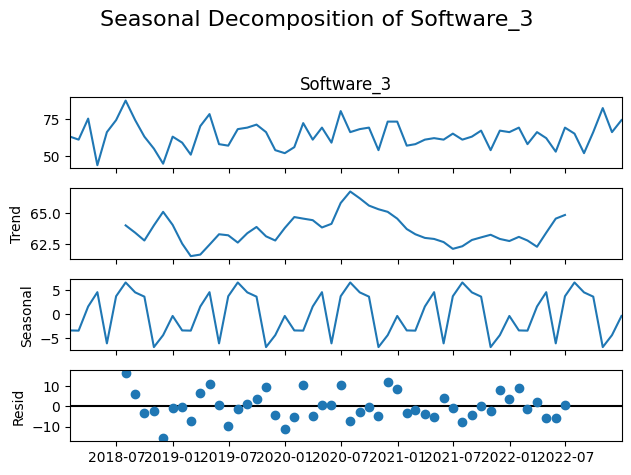

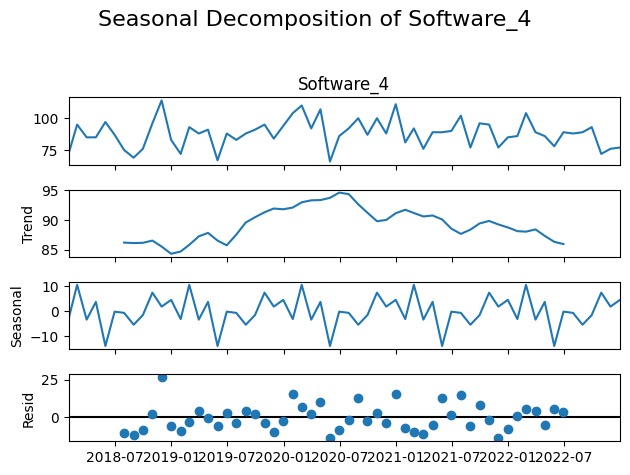

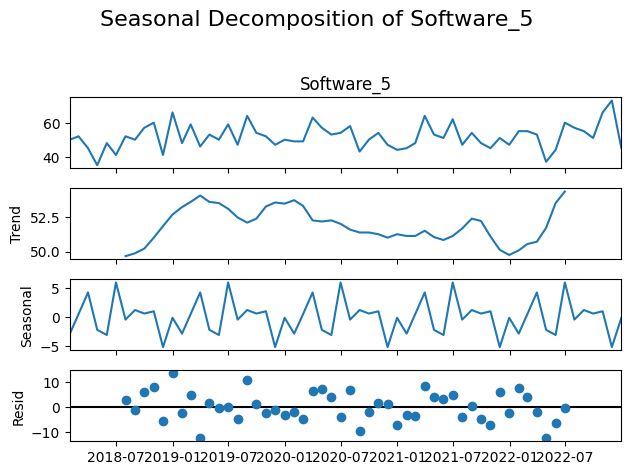

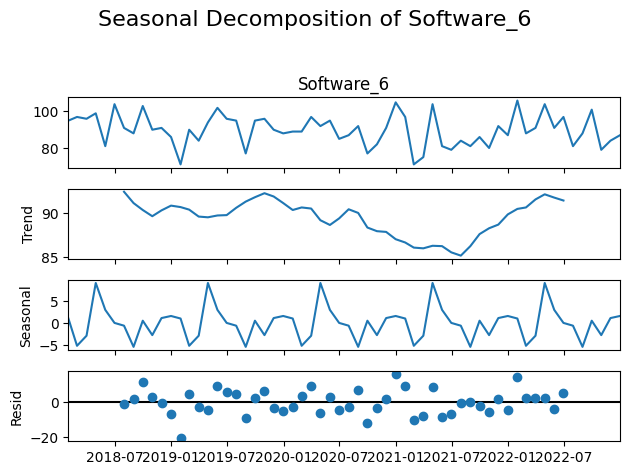

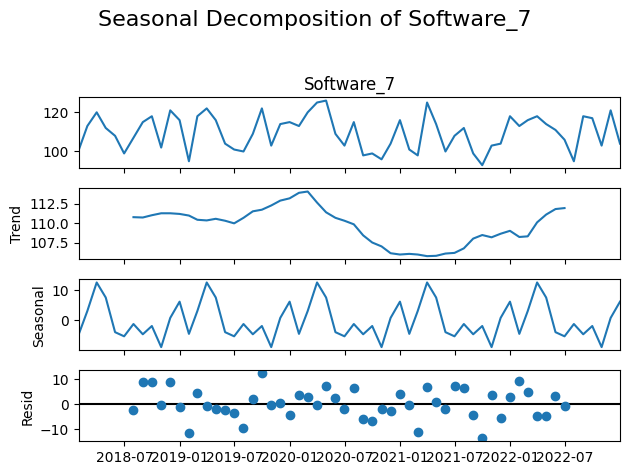

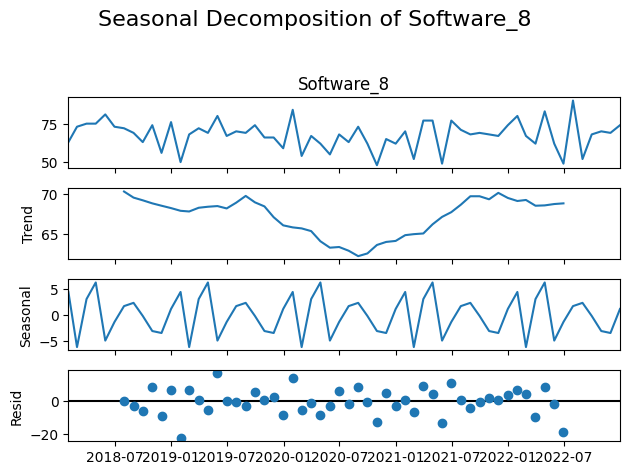

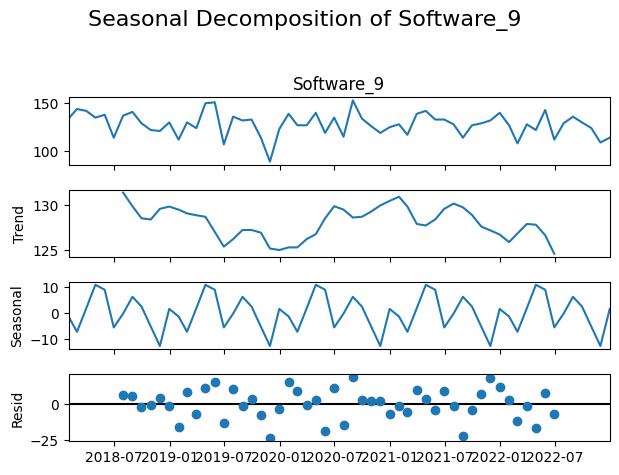

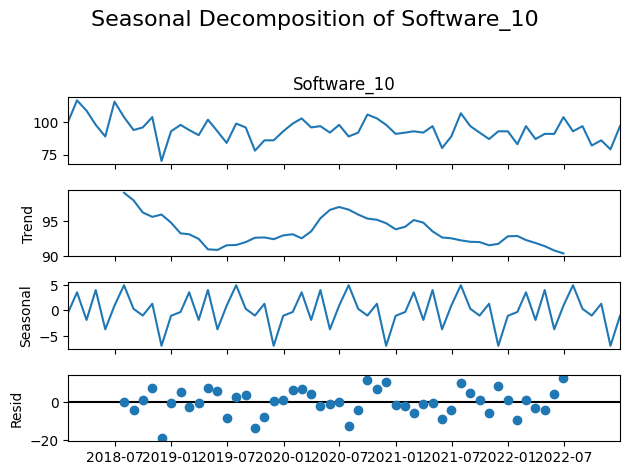

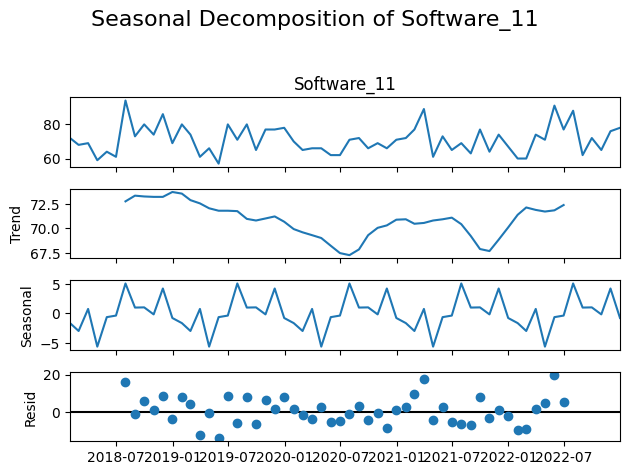

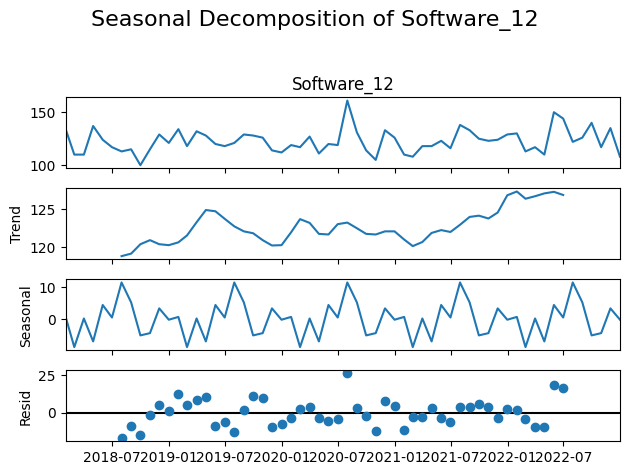

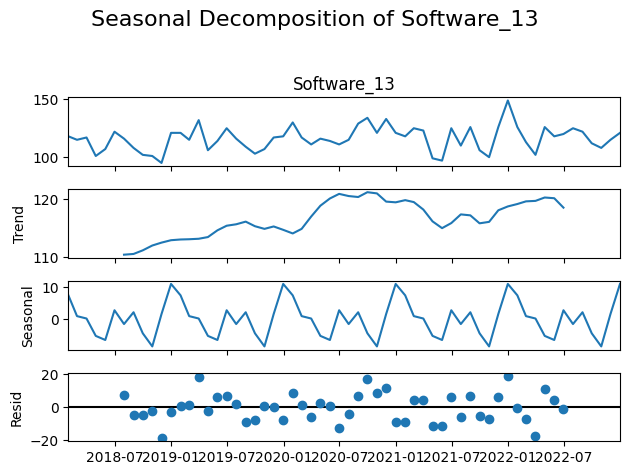

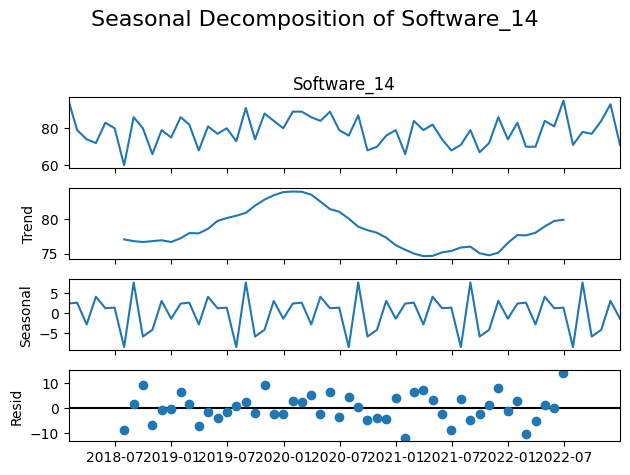

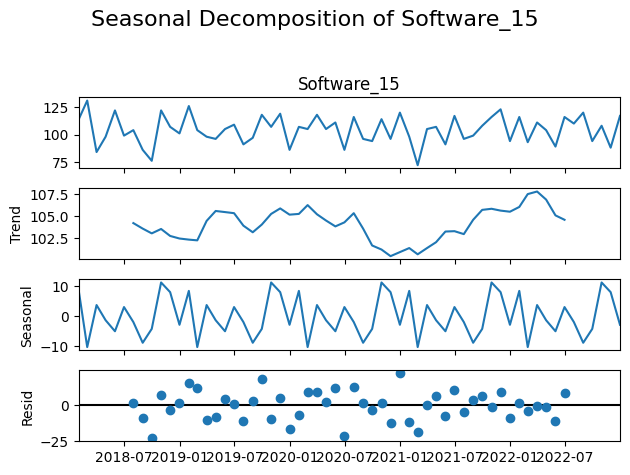

Inconsistent data:
            Software_1  Software_2  Software_3  Software_4  Software_5  \
Date                                                                     
2018-01-31         NaN         NaN         NaN         NaN         NaN   
2018-02-28         NaN       128.0         NaN         NaN         NaN   
2018-03-31         NaN         NaN         NaN         NaN         NaN   
2018-04-30         NaN         NaN         NaN         NaN         NaN   
2018-05-31         NaN         NaN         NaN         NaN         NaN   
2018-06-30         NaN         NaN         NaN         NaN         NaN   
2018-07-31         NaN         NaN        87.0         NaN         NaN   
2018-08-31         NaN         NaN         NaN         NaN         NaN   
2018-09-30         NaN         NaN         NaN         NaN         NaN   
2018-10-31         NaN         NaN         NaN         NaN         NaN   
2018-11-30         NaN         NaN         NaN       114.0         NaN   
2018-12-31         

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/kaggle/input/machine-learning-ca7/IT_Company_Time_Series.csv')
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Display basic information about the dataset
print(df.info())
print(df.describe())

# Check for missing values
missing_values = df.isnull().sum()
print(f"Missing values:\n{missing_values}")

# Impute or drop missing values
df = df.fillna(method='ffill')  # Forward fill as an example

# Plot the time series for each software
plt.figure(figsize=(15, 10))
for column in df.columns:
    plt.plot(df.index, df[column], label=column)
plt.title('Time Series of Software Usage')
plt.xlabel('Date')
plt.ylabel('Usage')
plt.legend()
fig.savefig(f'Time Series of Software Usage.png')
plt.show()

# Check for trends and seasonality using decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

for column in df.columns:
    decomposition = seasonal_decompose(df[column], model='additive')
    fig = decomposition.plot()
    fig.suptitle(f'Seasonal Decomposition of {column}', fontsize=16)
    fig.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the title
    
    # Save the figure
    fig.savefig(f'{column}_decomposition.png')
    
    plt.show()



# Check for data inconsistencies
inconsistent_data = df[(df < 0) | (df > df.quantile(0.99))]  # Example threshold for inconsistency
print(f"Inconsistent data:\n{inconsistent_data}")

# Remove or handle inconsistencies
df = df.clip(lower=0)  # Example of handling negative values


## Forecasting using Srima

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
time_series_df = pd.read_csv('/kaggle/input/machine-learning-ca7/IT_Company_Time_Series.csv')

# Convert 'Date' to datetime
time_series_df['Date'] = pd.to_datetime(time_series_df['Date'])

# Set 'Date' as the index
time_series_df.set_index('Date', inplace=True)

# Check for null values
print(time_series_df.isnull().sum())

# Drop rows with null values
time_series_df.dropna(inplace=True)

# List of software columns
software_columns = time_series_df.columns

# Function to apply SARIMA model and plot the results
def apply_sarima_and_forecast(data, column):
    # Split data into training and test sets
    train = data.iloc[:-12]
    test = data.iloc[-12:]

    # Apply SARIMA
    sarima_model = SARIMAX(train[column], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    sarima_fit = sarima_model.fit(disp=False)

    # Forecast
    forecast = sarima_fit.get_forecast(steps=12)
    forecast_index = test.index
    forecast_values = forecast.predicted_mean
    test['Forecast'] = forecast_values.values

    # Plot the forecast
    plt.figure(figsize=(12, 6))
    plt.plot(train[column], label='Train')
    plt.plot(test[column], label='Test')
    plt.plot(test['Forecast'], label='Forecast', linestyle='--')
    plt.title(f'{column} Demand Forecast')
    plt.xlabel('Date')
    plt.ylabel('Demand')
    plt.legend()
    plt.savefig(f'{column}_demand_forecast.png')  # Save the plot as a PNG file
    plt.close()  # Close the plot to avoid display

    # Calculate the mean squared error
    mse = mean_squared_error(test[column], test['Forecast'])
    print(f'{column} Mean Squared Error: {mse}')

# Apply SARIMA model to each software column
for column in software_columns:
    apply_sarima_and_forecast(time_series_df, column)


Software_1     0
Software_2     0
Software_3     0
Software_4     0
Software_5     0
Software_6     0
Software_7     0
Software_8     0
Software_9     0
Software_10    0
Software_11    0
Software_12    0
Software_13    0
Software_14    0
Software_15    0
dtype: int64


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/tmp/ipykernel_33/2971281806.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

Software_1 Mean Squared Error: 223.68283226344138


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/tmp/ipykernel_33/2971281806.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

Software_2 Mean Squared Error: 106.18758405549805


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/tmp/ipykernel_33/2971281806.py:39: SettingWithCopyWarning: 
A value is 

Software_3 Mean Squared Error: 101.09195290791568


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/tmp/ipykernel_33/2971281806.py:39: SettingWithCopyWarning: 
A value is 

Software_4 Mean Squared Error: 116.00803969344317


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/tmp/ipykernel_33/2971281806.py:39: SettingWithCopyWarning: 
A value is trying to

Software_5 Mean Squared Error: 135.66667680483


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/tmp/ipykernel_33/2971281806.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

Software_6 Mean Squared Error: 127.0660463909407


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/tmp/ipykernel_33/2971281806.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

Software_7 Mean Squared Error: 166.80121324631665


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/tmp/ipykernel_33/2971281806.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

Software_8 Mean Squared Error: 161.32537009357426


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/tmp/ipykernel_33/2971281806.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

Software_9 Mean Squared Error: 116.22447365767464


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/tmp/ipykernel_33/2971281806.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

Software_10 Mean Squared Error: 102.63806320967008


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/tmp/ipykernel_33/2971281806.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

Software_11 Mean Squared Error: 130.7519856401528


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observation

Software_12 Mean Squared Error: 214.69696467652955


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/tmp/ipykernel_33/2971281806.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

Software_13 Mean Squared Error: 142.825007057347


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/tmp/ipykernel_33/2971281806.py:39: SettingWithCopyWarning: 
A value is trying to

Software_14 Mean Squared Error: 186.08195509485378


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/tmp/ipykernel_33/2971281806.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

Software_15 Mean Squared Error: 181.09912951069546


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import warnings
warnings.filterwarnings("ignore")
# Load the dataset
time_series_df = pd.read_csv('/kaggle/input/machine-learning-ca7/IT_Company_Time_Series.csv')

# Convert 'Date' to datetime
time_series_df['Date'] = pd.to_datetime(time_series_df['Date'])

# Set 'Date' as the index
time_series_df.set_index('Date', inplace=True)

# Drop rows with null values
time_series_df.dropna(inplace=True)

# List of software columns
software_columns = time_series_df.columns

# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to apply SARIMA model and plot the results
def apply_sarima_and_forecast(data, column):
    # Split data into training and test sets
    train = data.iloc[:-12]
    test = data.iloc[-12:]

    # Apply SARIMA
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        sarima_model = SARIMAX(train[column], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
        sarima_fit = sarima_model.fit(disp=False)

    # Forecast
    forecast = sarima_fit.get_forecast(steps=12)
    forecast_values = forecast.predicted_mean
    test['Forecast'] = forecast_values.values

 

    # Calculate evaluation metrics
    mse = mean_squared_error(test[column], test['Forecast'])
    mae = mean_absolute_error(test[column], test['Forecast'])
    mape = mean_absolute_percentage_error(test[column], test['Forecast'])
    r_squared = r2_score(test[column], test['Forecast'])

    print(f'{column} Mean Squared Error: {mse}')
    print(f'{column} Mean Absolute Error: {mae}')
    print(f'{column} Mean Absolute Percentage Error: {mape:.2f}%')
    print(f'{column} R-squared: {r_squared:.2f}')

# Apply SARIMA model to each software column
for column in software_columns:
    apply_sarima_and_forecast(time_series_df, column)


Software_1 Mean Squared Error: 223.68283226344138
Software_1 Mean Absolute Error: 12.325394073805883
Software_1 Mean Absolute Percentage Error: 11.92%
Software_1 R-squared: -1.39
Software_2 Mean Squared Error: 106.18758405549805
Software_2 Mean Absolute Error: 8.392661475798871
Software_2 Mean Absolute Percentage Error: 7.87%
Software_2 R-squared: -0.07
Software_3 Mean Squared Error: 101.09195290791568
Software_3 Mean Absolute Error: 6.8422475628653
Software_3 Mean Absolute Percentage Error: 10.29%
Software_3 R-squared: -0.56
Software_4 Mean Squared Error: 116.00803969344317
Software_4 Mean Absolute Error: 8.292627275647993
Software_4 Mean Absolute Percentage Error: 10.41%
Software_4 R-squared: -0.65
Software_5 Mean Squared Error: 135.66667680483
Software_5 Mean Absolute Error: 9.92752228290856
Software_5 Mean Absolute Percentage Error: 18.30%
Software_5 R-squared: -0.58
Software_6 Mean Squared Error: 127.0660463909407
Software_6 Mean Absolute Error: 9.254842820654089
Software_6 Mean A

## Classification

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

# Load the dataset
issues_df = pd.read_csv('/kaggle/input/machine-learning-ca7/IT_Company_System_Issues_Classification.csv')

# Encode categorical variables
issues_df_encoded = pd.get_dummies(issues_df, columns=['Issue_Type', 'System_Component', 'Customer_Impact', 'Reported_By', 'Issue_Reported_Month'])

# Convert the 'Priority' column to a single column with labels
label_encoder = LabelEncoder()
issues_df_encoded['Priority'] = label_encoder.fit_transform(issues_df['Priority'])

# Define the target variable 'Priority' and features 'X'
X = issues_df_encoded.drop('Priority', axis=1)
y = issues_df_encoded['Priority']

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Normalize the feature variables
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.2, random_state=42)

# Dictionary to hold the models and their accuracy
model_accuracies = {}

# Function to evaluate models
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy
    print(f"Model: {model_name}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy}\n")

# Tuning RandomForest using GridSearchCV
rf_clf = RandomForestClassifier(random_state=42)
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_grid_search = GridSearchCV(estimator=rf_clf, param_grid=rf_param_grid, cv=3, n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train, y_train)
best_rf = rf_grid_search.best_estimator_
evaluate_model(best_rf, "Tuned Random Forest")
print(f"Best Parameters for Random Forest: {rf_grid_search.best_params_}")

# Tuning Logistic Regression using GridSearchCV
lr_clf = LogisticRegression(max_iter=1000, random_state=42)
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}

lr_grid_search = GridSearchCV(estimator=lr_clf, param_grid=lr_param_grid, cv=3, n_jobs=-1, verbose=2)
lr_grid_search.fit(X_train, y_train)
best_lr = lr_grid_search.best_estimator_
evaluate_model(best_lr, "Tuned Logistic Regression")
print(f"Best Parameters for Logistic Regression: {lr_grid_search.best_params_}")

# Tuning Support Vector Machine using GridSearchCV
svc_clf = SVC(probability=True, random_state=42)
svc_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

svc_grid_search = GridSearchCV(estimator=svc_clf, param_grid=svc_param_grid, cv=3, n_jobs=-1, verbose=2)
svc_grid_search.fit(X_train, y_train)
best_svc = svc_grid_search.best_estimator_
evaluate_model(best_svc, "Tuned Support Vector Machine")
print(f"Best Parameters for Support Vector Machine: {svc_grid_search.best_params_}")

# Tuning K-Nearest Neighbors using GridSearchCV
knn_clf = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid_search = GridSearchCV(estimator=knn_clf, param_grid=knn_param_grid, cv=3, n_jobs=-1, verbose=2)
knn_grid_search.fit(X_train, y_train)
best_knn = knn_grid_search.best_estimator_
evaluate_model(best_knn, "Tuned K-Nearest Neighbors")
print(f"Best Parameters for K-Nearest Neighbors: {knn_grid_search.best_params_}")

# Print model accuracies
print("Model Accuracies:")
for model_name, accuracy in model_accuracies.items():
    print(f"{model_name}: {accuracy}")


Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.3s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.2s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   1.2s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   1.2s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time

## Anomaly Detection

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


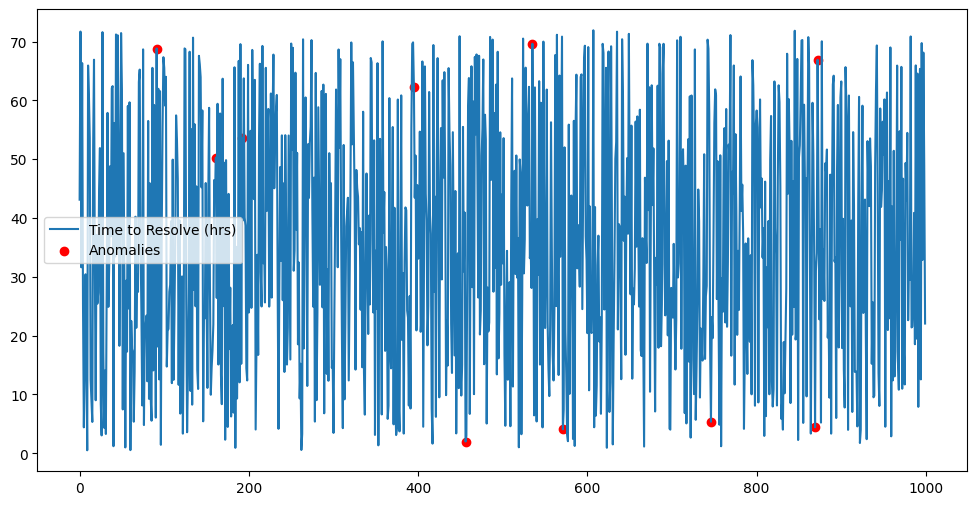

Detected anomalies:
     Issue_ID Issue_Type System_Component Customer_Impact  \
91       1040     Server      Component_D            High   
161      1340     Server      Component_A             Low   
192      9365     Server      Component_A            High   
395      1115    Network      Component_C          Medium   
456      3130   Software      Component_D            High   
535      2948    Network      Component_D             Low   
571      3016   Hardware      Component_A             Low   
746      5444   Software      Component_D          Medium   
869      8263   Hardware      Component_A          Medium   
872      4072     Server      Component_A             Low   

     Time_to_Resolve_hrs       Reported_By Priority  Previous_Occurrences  \
91             68.814546  Automated_System     High                     9   
161            50.269710          Customer     High                     9   
192            53.521977          Customer      Low                     1   


In [9]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Load the dataset
issues_df = pd.read_csv('/kaggle/input/machine-learning-ca7/IT_Company_System_Issues_Classification.csv')

# Drop the index column if present
if 'Unnamed: 0' in issues_df.columns:
    issues_df = issues_df.drop(columns=['Unnamed: 0'])

# Encode the categorical variables using one-hot encoding
issues_df_encoded = pd.get_dummies(issues_df, columns=['Issue_Type', 'System_Component', 'Customer_Impact', 'Reported_By', 'Priority', 'Issue_Reported_Month'])

# Define the features 'X'
X = issues_df_encoded.drop('Resolved', axis=1)

# Fit the Isolation Forest model
iso_forest = IsolationForest(contamination=0.01, random_state=42)
issues_df['Anomaly'] = iso_forest.fit_predict(X)

# Plot anomalies
anomalies = issues_df[issues_df['Anomaly'] == -1]
plt.figure(figsize=(12, 6))
plt.plot(issues_df.index, issues_df['Time_to_Resolve_hrs'], label='Time to Resolve (hrs)')
plt.scatter(anomalies.index, anomalies['Time_to_Resolve_hrs'], color='red', label='Anomalies')
plt.legend()
plt.show()

# Display detected anomalies
print("Detected anomalies:")
print(anomalies)


## Recommendation System

   InvoiceNo ItemCode         Most popular item of the day  Quantity  \
0        1.0   85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1        2.0    71053                  WHITE METAL LANTERN       6.0   
2        3.0   84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3        4.0   84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4        5.0   84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   

         Date  UnitPrice  CustomerID  
0  01/12/2018       2.55     43009.0  
1  02/12/2018       3.39     79874.0  
2  03/12/2018       2.75     45061.0  
3  04/12/2018       3.39     47110.0  
4  05/12/2018       3.39     77834.0  
         InvoiceNo     Quantity    UnitPrice    CustomerID
count  1000.000000  1000.000000  1000.000000   1000.000000
mean    500.500000    12.785000     3.037110  55584.374000
std     288.819436    38.423706     5.896942  25435.887426
min       1.000000   -24.000000     0.000000  10563.000000
25%     250.750000     2.000000     1.

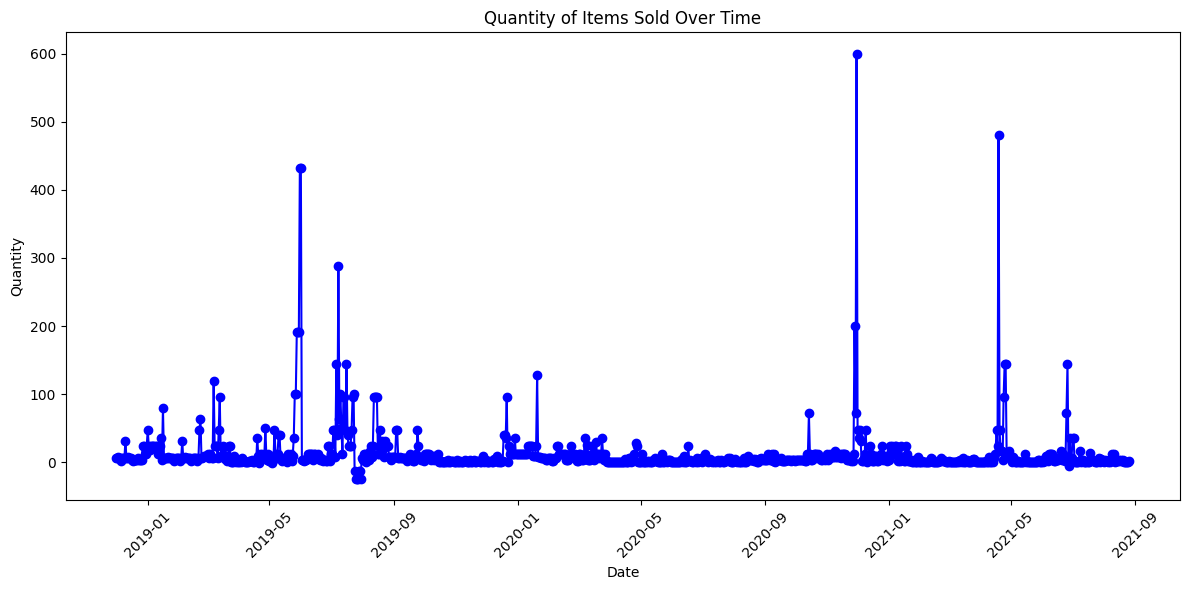

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
retail_df = pd.read_csv('/kaggle/input/machine-learning-ca7/IT_Retail_List.csv')

# Display the first few rows
print(retail_df.head())

# Summary statistics
print(retail_df.describe())

# Check for missing values
print(retail_df.isnull().sum())

# Convert 'Date' to datetime, handling different date formats
retail_df['Date'] = pd.to_datetime(retail_df['Date'], dayfirst=True, errors='coerce')

# Check for any parsing issues
print(retail_df[retail_df['Date'].isnull()])

# Handle missing values if any (removing rows with null dates or other null values)
retail_df.dropna(inplace=True)

# Plotting the quantity of items sold over time
plt.figure(figsize=(12, 6))
plt.plot(retail_df['Date'], retail_df['Quantity'], marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Quantity of Items Sold Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
fig.savefig(f'Retail Store.png')
plt.show()


In [6]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import random

# Load the dataset
retail_df = pd.read_csv('/kaggle/input/machine-learning-ca7/IT_Retail_List.csv')

# Data preprocessing: One-hot encoding
basket = (retail_df
          .groupby(['CustomerID', 'ItemCode'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('CustomerID'))

# Convert quantities to 1s and 0s
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Frequent itemsets using Apriori
frequent_itemsets = apriori(basket, min_support=0.001, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.1)

# Select 3 random customers
random_customers = random.sample(list(basket.index), 3)
print(f"Selected customers: {random_customers}")

# Generate recommendations for each customer
for customer in random_customers:
    purchased_items = set(basket.columns[basket.loc[customer] > 0])
    recommendations = set()

    for _, row in rules.iterrows():
        if purchased_items.intersection(row['antecedents']) and not purchased_items.intersection(row['consequents']):
            recommendations.update(row['consequents'])

    print(f"Recommendations for Customer {customer}: {list(recommendations)[:5]}")


/tmp/ipykernel_33/1030805313.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)
/opt/conda/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Selected customers: [53312.0, 24831.0, 35326.0]
Recommendations for Customer 53312.0: ['22910', '22631']
Recommendations for Customer 24831.0: ['21894', '22752']
Recommendations for Customer 35326.0: ['21584']


In [27]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import random

# Load the dataset
retail_df = pd.read_csv('/kaggle/input/machine-learning-ca7/IT_Retail_List.csv')

# Data preprocessing: One-hot encoding
basket = (retail_df
          .groupby(['CustomerID', 'ItemCode'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('CustomerID'))

# Convert quantities to 1s and 0s
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Frequent itemsets using Apriori
frequent_itemsets = apriori(basket, min_support=0.0005, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.05)

# Select 3 random customers
random_customers = random.sample(list(basket.index), 3)
print(f"Selected customers: {random_customers}")

# Generate recommendations for each customer
for customer in random_customers:
    purchased_items = set(basket.columns[basket.loc[customer] > 0])
    recommendations = set()

    for _, row in rules.iterrows():
        if purchased_items.intersection(row['antecedents']) and not purchased_items.intersection(row['consequents']):
            recommendations.update(row['consequents'])

    print(f"Recommendations for Customer {customer}: {list(recommendations)[:3]}")


/tmp/ipykernel_33/565774721.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)
/opt/conda/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Selected customers: [39974.0, 21700.0, 45538.0]
Recommendations for Customer 39974.0: []
Recommendations for Customer 21700.0: ['22969', '22752', '84029G']
Recommendations for Customer 45538.0: ['22082', '22910', '22742']
